In [1]:
import mdp
import numpy as np
import matplotlib.pyplot as plt

### GridWorld using Value Iteration: In this example, we will use value iteration to obtain the Q/value -function for the GridWorld problem and extract a policy

In [2]:
# instantiate grid world mdp object
gw = mdp.GridWorld(discount_factor=0.9)

mdp.value_iteration(gw, num_iters=50, theta=0)

Iteration# 0
-----------------------
 0.00  0.00  0.00  1.00 
 0.00  0.00  0.00 -1.00 
 0.00  0.00  0.00  0.00 
-----------------------
Iteration# 1
-----------------------
 0.00  0.00  0.72  1.00 
 0.00  0.00  0.00 -1.00 
 0.00  0.00  0.00  0.00 
-----------------------
Iteration# 2
-----------------------
 0.00  0.52  0.78  1.00 
 0.00  0.00  0.43 -1.00 
 0.00  0.00  0.00  0.00 
-----------------------
Iteration# 3
-----------------------
 0.37  0.66  0.83  1.00 
 0.00  0.00  0.51 -1.00 
 0.00  0.00  0.31  0.00 
-----------------------
Iteration# 4
-----------------------
 0.51  0.72  0.84  1.00 
 0.27  0.00  0.55 -1.00 
 0.00  0.22  0.37  0.13 
-----------------------
Iteration# 5
-----------------------
 0.59  0.73  0.85  1.00 
 0.41  0.00  0.57 -1.00 
 0.21  0.31  0.43  0.19 
-----------------------
Iteration# 6
-----------------------
 0.62  0.74  0.85  1.00 
 0.50  0.00  0.57 -1.00 
 0.34  0.36  0.45  0.24 
-----------------------
Iteration# 7
-----------------------
 0.63  0.74

In [3]:
# policy extraction
pi = gw.extract_policy()

print("-----------------------")
for y in range(gw.height-1, -1, -1):
    for x in range(gw.width):
        if (x,y) in pi:
            print(f"{pi[(x,y)]:<6}", end=' ')
        else:
            print(f"{'None':<6}", end=' ')
    print("")       
print("-----------------------")

-----------------------
right  right  right  end    
up     None   up     end    
up     left   up     left   
-----------------------


### Q-Learning/SARSA: For model free MDPs, we cxannot use value iteration. Instead, we can bootstrap from an estimate of the value function to update Q values. 

In [4]:
def moving_average(x, window_size):
    smoothed_x = []
    for i in range(len(x)):
        lo = max(0, i-window_size+1)
        windowed = x[lo:i+1]
        avg = sum(windowed) / len(windowed)
        smoothed_x.append(avg)
    return smoothed_x

def plot_rewards(rewards, smoothing=True, window_size=10):
    fig = plt.figure(figsize=(5, 5))
    if smoothing:
        plt.plot(moving_average(rewards, window_size))
    else:
        plt.plot(rewards)
    plt.xlabel("Episodes")
    plt.ylabel("Accumulated Reward")
    plt.minorticks_on()
    plt.grid(which='major', linestyle='-', linewidth='0.5', color='black')
    plt.grid(which='minor', linestyle=':', linewidth='0.5', color='gray')
    plt.show()

Episode# 0, length: 13, accumulated reward: 0.2824295364810001
-----------------------
 0.00  0.00  0.00  0.30 
 0.00  0.00  0.00  0.00 
 0.00  0.00  0.00  0.00 
-----------------------
Episode# 1, length: 85, accumulated reward: 0.00014334111979667836
-----------------------
 0.00  0.00  0.08  0.51 
 0.00  0.00  0.00  0.00 
 0.00  0.00  0.00  0.00 
-----------------------
Episode# 2, length: 49, accumulated reward: 0.00636268544113595
-----------------------
 0.00  0.02  0.14  0.66 
 0.00  0.00  0.00  0.00 
 0.00  0.00  0.00  0.00 
-----------------------
Episode# 3, length: 9, accumulated reward: 0.4304672100000001
-----------------------
 0.01  0.04  0.27  0.76 
 0.00  0.00  0.00  0.00 
 0.00  0.00  0.00  0.00 
-----------------------
Episode# 4, length: 11, accumulated reward: 0.3486784401000001
-----------------------
 0.01  0.04  0.40  0.83 
 0.00  0.00  0.07  0.00 
 0.00  0.00  0.00  0.00 
-----------------------
Episode# 5, length: 17, accumulated reward: 0.18530201888518416
--

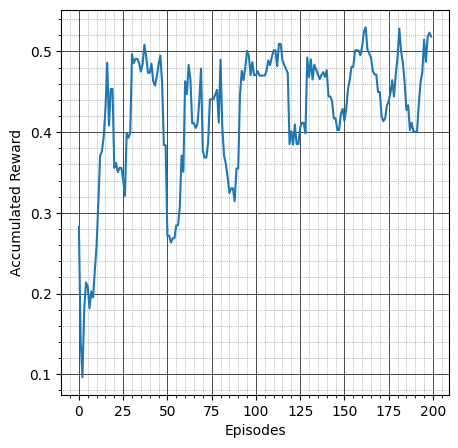

In [5]:
# instantiate grid world mdp object
gw2 = mdp.GridWorld(discount_factor=0.9)

# instantiate Q learner
QL = mdp.QLearner(gw2, alpha=0.3)

# training
episode_rewards = QL.train(episodes=200)

# policy extraction
pi = gw2.extract_policy()

print("-----------------------")
for y in range(gw2.height-1, -1, -1):
    for x in range(gw2.width):
        if (x,y) in pi:
            print(f"{pi[(x,y)]:<6}", end=' ')
        else:
            print(f"{'None':<6}", end=' ')
    print("")       
print("-----------------------")

plot_rewards(episode_rewards)


Episode# 0, length: 54, accumulated reward: 0.0037571021261363674
-----------------------
 0.00  0.00  0.00  0.30 
 0.00  0.00  0.00  0.00 
 0.00  0.00  0.00  0.00 
-----------------------
Episode# 1, length: 13, accumulated reward: 0.2824295364810001
-----------------------
 0.00  0.00  0.08  0.51 
 0.00  0.00  0.00  0.00 
 0.00  0.00  0.00  0.00 
-----------------------
Episode# 2, length: 136, accumulated reward: 6.648731184578617e-07
-----------------------
 0.00  0.02  0.17  0.66 
 0.00  0.00  0.00  0.00 
 0.00  0.00  0.00  0.00 
-----------------------
Episode# 3, length: 119, accumulated reward: 3.986723479010572e-06
-----------------------
 0.00  0.05  0.29  0.76 
 0.00  0.00  0.00  0.00 
 0.00  0.00  0.00  0.00 
-----------------------
Episode# 4, length: 20, accumulated reward: 0.13508517176729928
-----------------------
 0.01  0.10  0.40  0.83 
 0.00  0.00  0.00  0.00 
 0.00  0.00  0.00  0.00 
-----------------------
Episode# 5, length: 21, accumulated reward: 0.121576654590

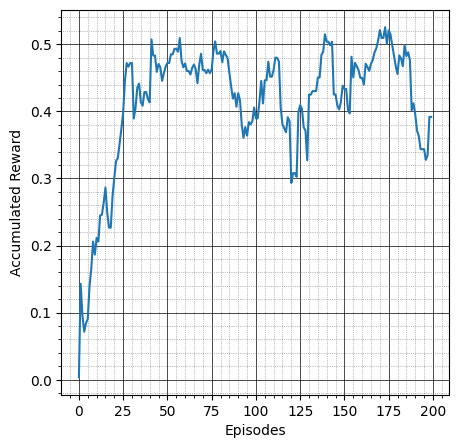

In [6]:
# instantiate grid world mdp object
gw3 = mdp.GridWorld(discount_factor=0.9)

# instantiate Q learner
QL2 = mdp.QLearner(gw3, alpha=0.3)

# training
episode_rewards = QL2.train(episodes=200, SARSA=True)

# policy extraction
pi = gw3.extract_policy()

print("-----------------------")
for y in range(gw3.height-1, -1, -1):
    for x in range(gw3.width):
        if (x,y) in pi:
            print(f"{pi[(x,y)]:<6}", end=' ')
        else:
            print(f"{'None':<6}", end=' ')
    print("")       
print("-----------------------")

plot_rewards(episode_rewards)

## Testing Q learning and SARSA on the CliffWorld problem

#### Obtaining Cliffworld policy using value iteration (Note that we're using a deterministic model here, so no transition noise)

In [7]:
# instantiate cliff world mdp object
cw1 = mdp.CliffWorld(discount_factor=0.9, noise=0.0)

mdp.value_iteration(cw1, num_iters=100, theta=0.01)

# policy extraction
pi1 = cw1.extract_policy()

print("-----------------------")
for y in range(cw1.height-1, -1, -1):
    for x in range(cw1.width):
        if (x,y) in pi1:
            print(f"{pi1[(x,y)]:<6}", end=' ')
        else:
            print(f"{'None':<6}", end=' ')
    print("")       
print("-----------------------")

Iteration# 0
-----------------------
-0.05 -0.05 -0.05 -0.05 -0.05 -0.05 
-0.05 -0.05 -0.05 -0.05 -0.05 -0.05 
-0.05 -0.05 -0.05 -0.05 -0.05  0.00 
-0.05  0.00  0.00  0.00  0.00  0.00 
-----------------------
Iteration# 1
-----------------------
-0.10 -0.10 -0.10 -0.10 -0.10 -0.10 
-0.10 -0.10 -0.10 -0.10 -0.10 -0.05 
-0.10 -0.10 -0.10 -0.10 -0.05  0.00 
-0.10  0.00  0.00  0.00  0.00  0.00 
-----------------------
Iteration# 2
-----------------------
-0.14 -0.14 -0.14 -0.14 -0.14 -0.10 
-0.14 -0.14 -0.14 -0.14 -0.10 -0.05 
-0.14 -0.14 -0.14 -0.10 -0.05  0.00 
-0.14  0.00  0.00  0.00  0.00  0.00 
-----------------------
Iteration# 3
-----------------------
-0.17 -0.17 -0.17 -0.17 -0.14 -0.10 
-0.17 -0.17 -0.17 -0.14 -0.10 -0.05 
-0.17 -0.17 -0.14 -0.10 -0.05  0.00 
-0.17  0.00  0.00  0.00  0.00  0.00 
-----------------------
Iteration# 4
-----------------------
-0.20 -0.20 -0.20 -0.17 -0.14 -0.10 
-0.20 -0.20 -0.17 -0.14 -0.10 -0.05 
-0.20 -0.17 -0.14 -0.10 -0.05  0.00 
-0.20  0.00  0.0

#### Obtaining Cliffworld policy using Q learning

In [8]:
# intantiate cliffworld object
cw2 = mdp.CliffWorld(discount_factor=0.9, noise=0.0)


Episode# 0, length: 30, accumulated reward: -0.7355064348623126
-----------------------
 0.00  0.00 -0.01  0.00  0.00  0.00 
 0.00  0.00  0.00  0.00  0.00  0.00 
-0.01  0.00  0.00  0.00  0.00  0.00 
 0.00  0.00  0.00  0.00  0.00  0.00 
-----------------------
Episode# 1, length: 2, accumulated reward: -5.0
-----------------------
 0.00  0.00 -0.01  0.00  0.00  0.00 
 0.00  0.00  0.00  0.00  0.00  0.00 
-0.01  0.00  0.00  0.00  0.00  0.00 
-0.01  0.00  0.00  0.00  0.00  0.00 
-----------------------
Episode# 2, length: 19, accumulated reward: -1.2504731764849961
-----------------------
-0.01 -0.01 -0.01  0.00  0.00  0.00 
-0.01  0.00  0.00  0.00  0.00  0.00 
-0.01  0.00  0.00  0.00  0.00  0.00 
-0.01  0.00  0.00  0.00  0.00  0.00 
-----------------------
Episode# 3, length: 44, accumulated reward: -0.5538763183215293
-----------------------
-0.01 -0.01 -0.01 -0.01  0.00  0.00 
-0.01 -0.01 -0.01  0.00  0.00  0.00 
-0.01  0.00  0.00  0.00  0.00  0.00 
-0.01  0.00  0.00  0.00  0.00  0.00 


Episode# 41, length: 18, accumulated reward: -1.3338590849833287
-----------------------
-0.08 -0.08 -0.07 -0.06 -0.04 -0.03 
-0.09 -0.08 -0.07 -0.06 -0.04 -0.03 
-0.10 -0.09 -0.07 -0.05 -0.03  0.00 
-0.13  0.00  0.00  0.00  0.00  0.00 
-----------------------
Episode# 42, length: 59, accumulated reward: -0.49876748264752124
-----------------------
-0.09 -0.08 -0.07 -0.06 -0.05 -0.04 
-0.09 -0.08 -0.07 -0.06 -0.05 -0.03 
-0.11 -0.09 -0.07 -0.05 -0.03  0.00 
-0.13  0.00  0.00  0.00  0.00  0.00 
-----------------------
Episode# 43, length: 7, accumulated reward: -3.1572050000000003
-----------------------
-0.09 -0.08 -0.07 -0.06 -0.05 -0.04 
-0.09 -0.08 -0.07 -0.06 -0.05 -0.03 
-0.11 -0.09 -0.07 -0.05 -0.03  0.00 
-0.13  0.00  0.00  0.00  0.00  0.00 
-----------------------
Episode# 44, length: 28, accumulated reward: -0.46769459055386675
-----------------------
-0.09 -0.09 -0.07 -0.06 -0.05 -0.04 
-0.10 -0.09 -0.07 -0.06 -0.05 -0.03 
-0.11 -0.09 -0.07 -0.06 -0.04  0.00 
-0.14  0.00  0.0

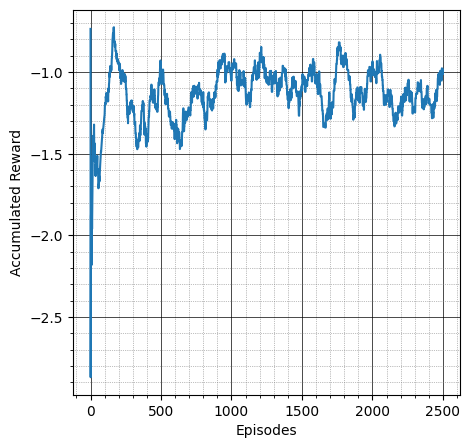

In [9]:

# instantiate Q learner
QL1 = mdp.QLearner(cw2, epsilon=0.2, alpha=0.1)

# training
episode_rewards = QL1.train(episodes=2500, SARSA=False)

# policy extraction
pi1 = cw2.extract_policy()

print("-----------------------")
for y in range(cw2.height-1, -1, -1):
    for x in range(cw2.width):
        if (x,y) in pi1:
            print(f"{pi1[(x,y)]:<6}", end=' ')
        else:
            print(f"{'None':<6}", end=' ')
    print("")       
print("-----------------------")

plot_rewards(episode_rewards, window_size=100)

#### Obtaining Cliffworld policy using SARSA

Episode# 0, length: 15, accumulated reward: -1.6438396227480503
-----------------------
 0.00  0.00  0.00  0.00  0.00  0.00 
 0.00  0.00  0.00  0.00  0.00  0.00 
 0.00  0.00  0.00  0.00  0.00  0.00 
-0.01  0.00  0.00  0.00  0.00  0.00 
-----------------------
Episode# 1, length: 31, accumulated reward: -0.7119557913760813
-----------------------
-0.01  0.00  0.00  0.00  0.00  0.00 
-0.01 -0.01  0.00  0.00  0.00  0.00 
-0.01  0.00  0.00  0.00  0.00  0.00 
-0.01  0.00  0.00  0.00  0.00  0.00 
-----------------------
Episode# 2, length: 13, accumulated reward: -1.9121476824050005
-----------------------
-0.01  0.00  0.00  0.00  0.00  0.00 
-0.01 -0.01  0.00  0.00  0.00  0.00 
-0.01 -0.01  0.00  0.00  0.00  0.00 
-0.02  0.00  0.00  0.00  0.00  0.00 
-----------------------
Episode# 3, length: 35, accumulated reward: -0.6390641947218471
-----------------------
-0.01 -0.01 -0.01  0.00  0.00  0.00 
-0.01 -0.01  0.00  0.00  0.00  0.00 
-0.01 -0.01 -0.01  0.00  0.00  0.00 
-0.02  0.00  0.00  0.

Episode# 47, length: 22, accumulated reward: -0.43921167270471545
-----------------------
-0.14 -0.13 -0.11 -0.09 -0.08 -0.06 
-0.16 -0.13 -0.10 -0.09 -0.06 -0.04 
-0.17 -0.15 -0.06 -0.05 -0.04  0.00 
-0.19  0.00  0.00  0.00  0.00  0.00 
-----------------------
Episode# 48, length: 22, accumulated reward: -0.43921167270471545
-----------------------
-0.14 -0.13 -0.11 -0.09 -0.08 -0.06 
-0.16 -0.13 -0.11 -0.09 -0.06 -0.04 
-0.17 -0.16 -0.06 -0.06 -0.04  0.00 
-0.19  0.00  0.00  0.00  0.00  0.00 
-----------------------
Episode# 49, length: 10, accumulated reward: -0.28476639500000006
-----------------------
-0.14 -0.13 -0.11 -0.09 -0.08 -0.06 
-0.16 -0.13 -0.11 -0.09 -0.07 -0.04 
-0.17 -0.16 -0.06 -0.06 -0.04  0.00 
-0.19  0.00  0.00  0.00  0.00  0.00 
-----------------------
Episode# 50, length: 29, accumulated reward: -0.4709251314984801
-----------------------
-0.14 -0.13 -0.12 -0.10 -0.08 -0.07 
-0.16 -0.13 -0.11 -0.09 -0.07 -0.04 
-0.17 -0.16 -0.06 -0.06 -0.04  0.00 
-0.20  0.00  0

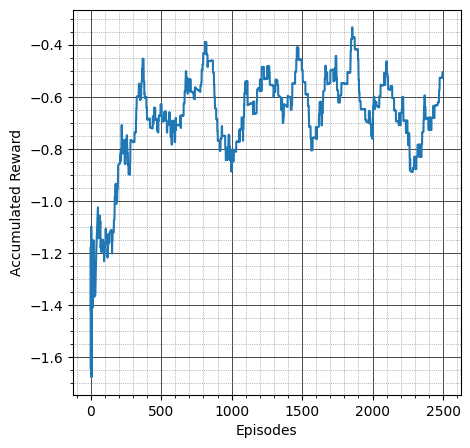

In [10]:
cw3 = mdp.CliffWorld(discount_factor=0.9, noise=0.0)

# instantiate Q learner
QL2 = mdp.QLearner(cw3, epsilon=0.2, alpha=0.1)

# training
episode_rewards = QL2.train(episodes=2500, SARSA=True)

# policy extraction
pi2 = cw3.extract_policy()

print("-----------------------")
for y in range(cw3.height-1, -1, -1):
    for x in range(cw3.width):
        if (x,y) in pi2:
            print(f"{pi2[(x,y)]:<6}", end=' ')
        else:
            print(f"{'None':<6}", end=' ')
    print("")       
print("-----------------------")

plot_rewards(episode_rewards, window_size=100)